In [1]:
# importing packages
import pandas as pd 
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline


# Data Gathering

In [2]:
# read twitter archive enhanced dataset into a pandas dataframe using pd.read_csv
df_weratedogs = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
# .head() to view the first 5 rows
df_weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# I downloaded the image url programmatically and saving it as weratedogs.tsv file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('weratedogs.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# checking to see whether we downloaded successfully and loading into a dataframe
df_image = pd.read_csv('weratedogs.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### For the third dataset 
I find it difficult obtaining the twitter api elevated access keys, so I used the udacity provided dataset to obtain the thirst dataset which is in json file format. I used pd.read_json to read the file.

In [ ]:
# Below is the code to query the twitter API and i have read and understood it

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_weratedogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# I used .read_json to load the json file into a pandas dataframe
df_tweet=pd.read_json('tweet-json.txt', lines=True)
df_tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
#selecting the tweet_id, favorite_count and retweet_count which is the 3 needed columns using .loc
df_tweet_updated = df_tweet.loc[:, ['id','retweet_count','favorite_count']]
df_tweet_updated.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing the Data

### *Assessing the first dataframe(df_weratedogs)*

#### Visual assessment

By visually assessing the data, I noticed that there are lots of null values spread across columns. Also, I noticed that Dog stage entries which should be recorded as an observation (rows) was rather represented as columns.

In [7]:
#checking for the number of columns and row. This dataframe have 2356 rows and 17 columns 
df_weratedogs.shape

(2356, 17)

In [8]:
df_weratedogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Programmatic assessment 

In [9]:
df_weratedogs.shape

(2356, 17)

In [10]:
#To see the first five rows
df_weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#To see the last 5 rows
df_weratedogs.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
df_weratedogs.retweeted_status_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_id, Length: 2356, dtype: float64

In [13]:
# We have 2356 unique tweet_id in the dataset
len(df_weratedogs['tweet_id'].unique())

2356

In [14]:
#checking whether the columns is represented with the right datatypes and whether it contained a null values as well using .info
df_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# Statistical summary of the data
df_weratedogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#checking for duplicate values
df_weratedogs.duplicated().sum()

0

In [17]:
# checking for columns with null values
df_weratedogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# checking whether some entries have denominator rating not equal to 10, and we have 23 entries that's not equal to 10
len(df_weratedogs[df_weratedogs['rating_denominator']!=10])

23

### Assessing the Second Dataframe (df_image)

##### Visual assessment

Visually looking at the dataset below, it doesn't seem to have much issue as the only noticeable issue is that some dognames started with a small letter while some started with capital letters. But we will further assess programmatically to
discover other hidden quality and tidiness issues 

In [19]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programmatic Assessment

In [20]:
# viewing the first 5 rows
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
# viewing the last 5 rows
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [22]:
# Randomly assessing the dataframe using .sample()
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
2002,876838120628539392,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True
1945,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True
869,697616773278015490,https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg,1,Lhasa,0.521931,True,Shih-Tzu,0.403451,True,Tibetan_terrier,0.039912,True


In [23]:
# checking for number of rows and columns
df_image.shape

(2075, 12)

In [24]:
# Assessing datatypes using .info()
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# checking for duplicates
df_image.duplicated().sum()

0

In [26]:
#checking for null values
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
#checking for the length of unique values
len(df_image['tweet_id'].unique())

2075

### Assessing the third dataframe (df_tweet_updated)

#### Visual Assessment 

In [28]:
df_tweet_updated 

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Programmatic Assessment 

In [29]:
df_tweet_updated.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [30]:
df_tweet_updated.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [31]:
# Checking number of rows and columns.
# The dataframe contains 2354 rows and 3 columns 
df_tweet_updated.shape

(2354, 3)

In [32]:
# randomly assessing the dataset using .sample
df_tweet_updated.sample(10)

,id,retweet_count,favorite_count
1572,687480748861947905,281,1760
817,770655142660169732,2013,8130
2304,666835007768551424,83,222
667,790277117346975746,3732,14081
1805,676916996760600576,2002,3231
1795,677269281705472000,790,2164
130,867051520902168576,8425,33420
1927,674042553264685056,142,772
1471,693647888581312512,673,2961
1342,704499785726889984,1124,3212


In [33]:
# Checking for incorrect datatypes using .info
df_tweet_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Correct datatypes and absence of null values 

In [34]:
# checking for duplicates 
df_tweet_updated.duplicated().sum()

0

In [35]:
# checking for the statistical summary using .describe
df_tweet_updated.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Quality Issues

1. Tweet_id have incorrect datatype integer instead of string(object)


2. Date and time should be in a separate column instead of a single timestamp column.


3. Timestamp column have an incorrect datatype of object instead of datetime datatype. 


4. Some entries for rate_denominator column have ratings above and below 10 which is wrong. Rate 
   denominator should be 10.
   

5. Dropping columns containing the retweets records. These columns are the retweeted_status_id and retweeted_status_user_id


6. There are missing values in the df_weratedogs dataframe columns. These columns include: in_reply_to_status_id,                    in_reply_to_use_id, retweeted_status_id, retweeted_status_timestamp, expand urls.


7. Inconsistency issues as some dognames entries in the p1 and p2 columns of the df_image dataframe have some dognames initial in capital while some are in small    letter.


8. Irrelevant columns in the df_image dataframe like img_num and some irrelevant columns in the df_weratedogs dataframe should be dropped 


## Tidyness Issues

1. First, the three dataset should be in one dataframe and be analysed as one dataset, hence the 3 datasets should be merged. 


2. For the df_weratedogs dataframe, dog stage columns failed the tidiness rule of each row forms an observation. It have 4          columns of the different dog stages instead of one column

# Data Cleaning 

Before cleaning, I will make a copy of the dataset using .copy(). This is necessary because one can easily make reference to the original dataframes once you make a mistake in the cleaning process or loose important data or entries while cleaning the data.

In [36]:
#  copy the dataframe into another dataframe 
df_weratedogs_clean= df_weratedogs.copy()
df_image_clean = df_image.copy()
df_tweet_updated_clean = df_tweet_updated.copy()

## Quality issues

#### Define: Quality Issue 1

Changing tweet_id datatype from integer to object datatyoe

In [37]:
# Code using .astype()
df_weratedogs_clean['tweet_id'] = df_weratedogs_clean['tweet_id'].astype('object')

In [38]:
# Testing the code and our datatype was correctly changed 
df_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define: quality issue 2

Splitting the timestamp column into a separate date and time columns

In [39]:
# changing the timestamp column into a datetime datatype which is not really necessary since we will still split the columns 
df_weratedogs_clean['timestamp'] = pd.to_datetime(df_weratedogs_clean['timestamp'])

In [40]:
df_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### code

In [41]:
# I splitted the timestamp column into a separate date and time column using using .apply() and lambda function
df_weratedogs_clean['Time'], df_weratedogs_clean['Date']= df_weratedogs_clean['timestamp'].apply(lambda x:x.time()),df_weratedogs_clean['timestamp'].apply(lambda x:x.date())

#### Test

In [42]:
# To test if the timestamp column was successfully splitted 
df_weratedogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Time', 'Date'],
      dtype='object')

#### Define: quality issue 3

changing date and time columns into datetime datatypes respectively.
#### Code

In [43]:
# converting date column into datetime datatype using pd.to datetime
df_weratedogs_clean["Date"] = pd.to_datetime(df_weratedogs_clean["Date"])

#### Test

In [44]:
# using .info() to check if the datatypes was changed successfully 
df_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define: quality issue 4

Subsetting the dataframe to have rating denominator equal to 10

#### Code

In [45]:
# selecting entries with rating_denominator equals to 10
df_weratedogs_clean = df_weratedogs_clean[df_weratedogs_clean['rating_denominator']==10]

#### Test

In [46]:
# testing if we have successfully selected entries with rating denominator equal to 10
len(df_weratedogs_clean.rating_denominator[df_weratedogs_clean.rating_denominator != 10])

0

In [47]:
df_weratedogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Time', 'Date'],
      dtype='object')

#### Define: quality issue 5 

filter to rows where retweets are null and drop columns containing retweet records (retweet_status_user_id and retweet_status_id)

#### Code

In [48]:
# filter to get rows where retweets  is null 
df_weratedogs_clean=df_weratedogs_clean[df_weratedogs_clean.retweeted_status_id.isnull()]

In [49]:
# Testing whether we have successfully filtered rows having retweets as nulls 
df_weratedogs_clean.retweeted_status_id.notnull().sum()

0

In [50]:
df_weratedogs_clean.retweeted_status_user_id.notnull().sum()

0

In [51]:
# using .drop to remove columns having retweet records
df_weratedogs_clean.drop(['retweeted_status_id', 'retweeted_status_user_id'], axis=1, inplace=True)

#### Test

In [52]:
# using .columns to know whether those columns were dropped
df_weratedogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'Time', 'Date'],
      dtype='object')

### Define: issue 6 

Dropping the columns with missing values which are not relevant in our analysis

#### Code

In [53]:
# dropping unwanted columns using .drop()
drp_list=['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'retweeted_status_timestamp', 'expanded_urls']
df_weratedogs_clean.drop(drp_list, axis=1, inplace=True)

#### Test

In [54]:
# Check if unneeded columns were dropped
df_weratedogs_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'Time', 'Date'],
      dtype='object')

#### Define: quality issue 7

Inconsistency issues: p1 and p2 columns of df_image dataframe have some dog names starting with capital and some small letters

#### Code

In [55]:
# using .capitalize to change the name of the dogs into a capital letter initials
df_image['p1'] = pd.Series(df_image['p1']).str.capitalize()
df_image['p2'] = pd.Series(df_image['p2']).str.capitalize()
df_image['p3'] = pd.Series(df_image['p3']).str.capitalize()

#### Test

In [56]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,Basenji,0.344101,True,Ibizan_hound,0.210282,True,Toy_terrier,0.196279,True
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
1907,852553447878664193,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,Bloodhound,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,Teapot,0.981819,False,Cup,0.014026,False,Coffeepot,0.002421,False
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,Pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True


#### Define: quality issue 8

Drop img_num columns from the df_image dataframe

#### Code

In [57]:
df_image.drop(['img_num'], axis=1, inplace= True)

In [58]:
#Test
df_image.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Tidyness Issues

### Define: Tidyness Issue 1

The issue here is a tidiness issue where the dog stages are seen as columns instead of as an observation(rows). The code below are used to address this problem

#### Code

In [59]:
# replacing none with an empty space 
df_weratedogs_clean['doggo'].replace("None",  "", inplace=True)
df_weratedogs_clean['floofer'].replace("None", "", inplace=True)
df_weratedogs_clean['pupper'].replace("None", "", inplace=True)
df_weratedogs_clean['puppo'].replace("None", "", inplace=True)

In [60]:
# joining the doggo, floofer, pupper and puppo columns into a single dog stage column
df_weratedogs_clean['dog_stages'] = df_weratedogs_clean.loc[:, ['doggo', 'floofer', 'puppo', 'pupper']].apply(lambda x: ''.join(x), axis = 1)

#### Test 

As seen below, we successfully create a new column(dog_stages) with the dog stages as rows but we have empty cells which would be replaced with str(None)

In [61]:
df_weratedogs_clean['dog_stages'].value_counts()

                1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [62]:
# replacing empty cells in dog stge column with None
df_weratedogs_clean['dog_stages'] = df_weratedogs_clean['dog_stages'] .replace('', 'None')

In [63]:
# Testing to see if it worked 
df_weratedogs_clean['dog_stages'].value_counts()

None            1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

Meanwhile, I noticed that some entries in the dog stage columns have two dog stages together. This will be separated with a comma. Using .mask() appears to be the best approach

In [64]:
# using .mask to add , to dog having two combined stages
df_weratedogs_clean['dog_stages'].mask(df_weratedogs_clean['dog_stages'] == 'doggopupper', 'doggo, pupper', inplace=True)
df_weratedogs_clean['dog_stages'].mask(df_weratedogs_clean['dog_stages'] == 'doggopuppo', 'doggo, puppo', inplace=True)
df_weratedogs_clean['dog_stages'].mask(df_weratedogs_clean['dog_stages'] == 'doggofloofer', 'doggo, floofer', inplace=True)

In [65]:
# checking if the joined dog stages were separated
df_weratedogs_clean['dog_stages'].value_counts()

None              1809
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

In [66]:
# using .drop() to remove the dog stages in column format
df_weratedogs_clean.drop(['doggo', 'floofer', 'puppo','pupper'], axis=1, inplace=True)

In [67]:
df_weratedogs_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'Time', 'Date', 'dog_stages'],
      dtype='object')

### Define: Tidyness Issue 2

Merging the 3 dataframes

#### Code

In [68]:
# to rename id column of df_tweet_updated_clean to tweet_id
df_tweet_updated_clean.rename(columns = {'id':'tweet_id'}, inplace=True)
df_tweet_updated_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [69]:
# using .merge to join the df_weratedogs_clean and df_tweet_updated_clean dataframe
df_merge = df_weratedogs_clean.merge(df_tweet_updated_clean, how='inner', on= 'tweet_id')

In [70]:
# Test
df_merge

,tweet_id,source,text,rating_numerator,rating_denominator,name,Time,Date,dog_stages,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,16:23:56,2017-08-01,None,8853,39467
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,00:17:27,2017-08-01,None,6514,33819
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,00:18:03,2017-07-31,None,4328,25461
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,15:58:51,2017-07-30,None,8964,42908
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,16:00:24,2017-07-29,None,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...
2148,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,00:24:50,2015-11-16,None,41,111
2149,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,00:04:52,2015-11-16,None,147,311
2150,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,23:21:54,2015-11-15,None,47,128
2151,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,23:05:30,2015-11-15,None,48,132


In [71]:
# checking for duplicates
df_merge.duplicated().sum()

0

In [72]:
# Merging the second column (df_image_clean)
df_merge2 = df_merge.merge(df_image_clean, how='inner', on = 'tweet_id')

In [73]:
# Testing
df_merge2

,tweet_id,source,text,rating_numerator,rating_denominator,name,Time,Date,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,16:23:56,2017-08-01,None,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,00:17:27,2017-08-01,None,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,00:18:03,2017-07-31,None,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,15:58:51,2017-07-30,None,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,16:00:24,2017-07-29,None,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,00:24:50,2015-11-16,None,41,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1972,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,00:04:52,2015-11-16,None,147,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1973,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,23:21:54,2015-11-15,None,47,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1974,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,23:05:30,2015-11-15,None,48,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


I noticed that .str.capitalize in df_image did not work when the dataset was merged, so the process was repeated in the df_merge 2 dataframe

In [74]:
df_merge2['p1'] = pd.Series(df_merge2['p1']).str.capitalize()
df_merge2['p2'] = pd.Series(df_merge2['p2']).str.capitalize()
df_merge2['p3'] = pd.Series(df_merge2['p3']).str.capitalize()

In [75]:
# checking for incorrect datatype using .info()
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   object        
 1   source              1976 non-null   object        
 2   text                1976 non-null   object        
 3   rating_numerator    1976 non-null   int64         
 4   rating_denominator  1976 non-null   int64         
 5   name                1976 non-null   object        
 6   Time                1976 non-null   object        
 7   Date                1976 non-null   datetime64[ns]
 8   dog_stages          1976 non-null   object        
 9   retweet_count       1976 non-null   int64         
 10  favorite_count      1976 non-null   int64         
 11  jpg_url             1976 non-null   object        
 12  img_num             1976 non-null   int64         
 13  p1                  1976 non-null   object      

In [76]:
# Dropping image number column
df_merge2.drop(['img_num'], axis=1, inplace=True)

In [77]:
df_merge2

,tweet_id,source,text,rating_numerator,rating_denominator,name,Time,Date,dog_stages,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,16:23:56,2017-08-01,None,8853,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,00:17:27,2017-08-01,None,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,00:18:03,2017-07-31,None,4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,15:58:51,2017-07-30,None,8964,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,16:00:24,2017-07-29,None,9774,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,00:24:50,2015-11-16,None,41,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1972,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,00:04:52,2015-11-16,None,147,...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
1973,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,23:21:54,2015-11-15,None,47,...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
1974,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,23:05:30,2015-11-15,None,48,...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [78]:
# Changing some incorrect datatypes into its correct datatypes
df_merge2.dog_stages = df_merge2.dog_stages.astype('category')
df_merge2.p1_dog = df_merge2.p1_dog.astype('category')
df_merge2.p2_dog = df_merge2.p2_dog.astype('category')
df_merge2.p3_dog = df_merge2.p3_dog.astype('category')

In [79]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   object        
 1   source              1976 non-null   object        
 2   text                1976 non-null   object        
 3   rating_numerator    1976 non-null   int64         
 4   rating_denominator  1976 non-null   int64         
 5   name                1976 non-null   object        
 6   Time                1976 non-null   object        
 7   Date                1976 non-null   datetime64[ns]
 8   dog_stages          1976 non-null   category      
 9   retweet_count       1976 non-null   int64         
 10  favorite_count      1976 non-null   int64         
 11  jpg_url             1976 non-null   object        
 12  p1                  1976 non-null   object        
 13  p1_conf             1976 non-null   float64     

I noticed some names in the name columns are not actual dog name. So, I will subset the name columns to get the dog names starting with capital letters A-Z

In [80]:
# code using .str.contains
df_merge2 = df_merge2[df_merge2['name'].str.contains('^[A-Z]+')]

In [81]:
# Test
df_merge2

,tweet_id,source,text,rating_numerator,rating_denominator,name,Time,Date,dog_stages,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,16:23:56,2017-08-01,None,8853,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,00:17:27,2017-08-01,None,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,00:18:03,2017-07-31,None,4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,15:58:51,2017-07-30,None,8964,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,16:00:24,2017-07-29,None,9774,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,666082916733198337,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,6,10,None,02:38:37,2015-11-16,None,47,...,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,Pug,0.489814,True,Bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1963,666073100786774016,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,10,10,None,01:59:36,2015-11-16,None,174,...,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1964,666071193221509120,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,9,10,None,01:52:02,2015-11-16,None,67,...,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1971,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,00:24:50,2015-11-16,None,41,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [82]:
df_merge2['name'].value_counts()

None          534
Charlie        11
Lucy           10
Cooper         10
Oliver         10
             ... 
Leela           1
Glenn           1
Shelby          1
Sephie          1
Christoper      1
Name: name, Length: 912, dtype: int64

## Saving to a csv file named twitter_archive_master.csv

In [83]:
df_merge2.to_csv("twitter_archive_master2.csv", index=False)

# EDA: Analysis and Visualizations

In [84]:
archive_master = pd.read_csv("twitter_archive_master2.csv")

In [85]:
archive_master

,tweet_id,source,text,rating_numerator,rating_denominator,name,Time,Date,dog_stages,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,16:23:56,2017-08-01,None,8853,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,00:17:27,2017-08-01,None,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,00:18:03,2017-07-31,None,4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,15:58:51,2017-07-30,None,8964,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,16:00:24,2017-07-29,None,9774,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,666082916733198337,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,6,10,None,02:38:37,2015-11-16,None,47,...,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,Pug,0.489814,True,Bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1877,666073100786774016,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,10,10,None,01:59:36,2015-11-16,None,174,...,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1878,666071193221509120,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,9,10,None,01:52:02,2015-11-16,None,67,...,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1879,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,00:24:50,2015-11-16,None,41,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Q1: Top dog stages with the highest rating 

In [86]:
archive_master.groupby('dog_stages')['rating_numerator'].mean().sort_values(ascending=False)

dog_stages
doggo, puppo      13.000000
floofer           12.000000
puppo             12.000000
None              11.932577
doggo             11.885246
doggo, floofer    11.000000
doggo, pupper     10.875000
pupper            10.695876
Name: rating_numerator, dtype: float64

Text(0.5, 0, 'Dog_stages')

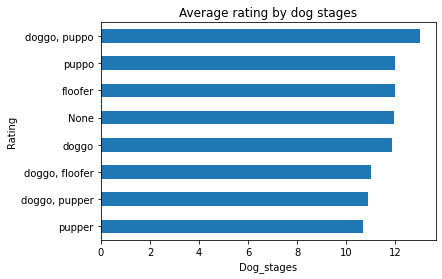

In [87]:
archive_master.groupby('dog_stages')['rating_numerator'].mean().sort_values().plot(kind='barh')
                                                                                                    
plt.title('Average rating by dog stages')
plt.ylabel('Rating')
plt.xlabel('Dog_stages')

Doggo,puppo have the highest ratings

## Q2: Dogs stages with highest retweets??

In [88]:
archive_master.groupby('dog_stages')['retweet_count'].mean().sort_values()

dog_stages
pupper             2343.634021
None               2608.253308
doggo, floofer     3433.000000
doggo, pupper      4153.875000
floofer            4968.714286
puppo              6473.954545
doggo              7233.885246
doggo, puppo      19196.000000
Name: retweet_count, dtype: float64

Text(0, 0.5, 'Dog_stages')

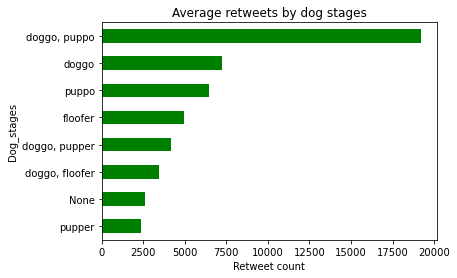

In [89]:
archive_master.groupby('dog_stages')['retweet_count'].mean().sort_values().plot(kind='barh', color='green')
plt.title('Average retweets by dog stages')
plt.xlabel('Retweet count')
plt.ylabel('Dog_stages')

Doggo, puppo have the highest retweets

## Q3: Dog stages with the highest likes??

In [90]:
archive_master.groupby('dog_stages')['favorite_count'].mean().sort_values()

dog_stages
pupper             7138.984536
None               8649.395715
doggo, pupper     12807.000000
floofer           13206.000000
doggo, floofer    17169.000000
doggo             19616.081967
puppo             21582.090909
doggo, puppo      47844.000000
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Dog_stages')

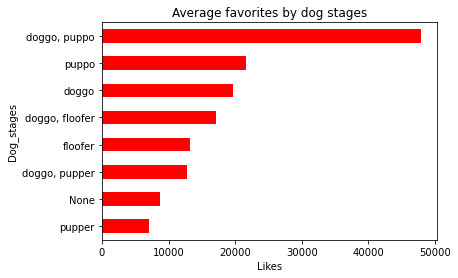

In [91]:
archive_master.groupby('dog_stages')['favorite_count'].mean().sort_values().plot(kind='barh', color= 'red')
plt.title('Average favorites by dog stages')
plt.xlabel('Likes')
plt.ylabel('Dog_stages')

**Comment**: From the above visuals, doggo, puppo have the highest likes, retweets, as well as ratings 